## AI CA

GitHub - https://github.com/Rfg2048/AI

## A1 - Identify the differences between a graph and a tree.

According to Cambridge Dictionary a graph is a picture that shows  how two sets of information or variables are related, usually by lines or curves, and a tree diagram shows the relationships between different pieces of information using lines that are connected and have different branches.

One of the main differences between graph and tree is the structure cycle, while graph can be connnected or disconnected, have cycles or loops and doesn't necessarily have a root node, the tree structure cycle relies on a single root node which is connected and acyclic (graph with no graph cycles).

While a graph can havy any number of edges directed or undirected, trees may only have $n$ being nodes, $n-1$ number of edges and they are always directed. Graphs are used normally to model complex systems or relationships, like social networks or computer networks. Trees are used to represent data with hierachy structure, such as dile systems pr organization charts.



## A2 - Explain in detail how the graph is an abstraction of the problem.

The graph is an abstraction of the problem in this case to model and analyze the routes and paths in a visual manner by using the nodes and edges to be each possible stage that can be reached, node A being starting point and node S being the end goal, its visible that there are many different paths and judging by the weight which is some sort of cost, better routes can be drawn and followed, once the fastest route, which would be the lower number path or the most point rewarding route, the path that adds more, are chosen they can be easily followed.

The graph provides a structured abstraction of the problem, in other words a feasible abstraction easy on the eyes.

## A3 - Identify the advantages of using a visualisation such as the one shown

There are many advantages by using a visual display of the information provided, such as easy understanding, by showing intuitive representation of the data that may or may not be complex, another advantage is the pathfiding, which in this case is the main goal of the graph, to arrive from point A to point S effectively and efficiently, another great advantage is the presentation, by visualization it gets easy to explain and present data regardless of its complexity, which can be filtered and broken down accordingly.

To summarize, visualization is a powerful tool for problem solving, data analysis and decision-making, they can improve understanding  and help with decisions from the insight given.

## B - Demonstrate how Dijkstra’s algorithm would find the shortest path to the solution in Fig.1 through diagrams and written explanation of each stage.

Firstly the figure is converted to a python graph for visualization

In [105]:
import heapq


def calculate_distances(graph, starting_vertex):
    distances = {vertex: float('infinity') for vertex in graph}
    distances[starting_vertex] = 0

    pq = [(0, starting_vertex)]
    while len(pq) > 0:
        current_distance, current_vertex = heapq.heappop(pq)

        # Nodes can get added to the priority queue multiple times. We only
        # process a vertex the first time we remove it from the priority queue.
        if current_distance > distances[current_vertex]:
            continue

        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight

            # Only consider this new path if it's better than any path we've
            # already found.
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor))

    return distances

#Line of code provided in-class called Dijkstra's Algorithm used to determine the shortest path

In [43]:
fig1_graph = {
    'A': {'B': 1, 'C': 5, 'H': 2},
    'B': {'A': 1, 'C': 2, 'D': 4},
    'C': {'A': 5, 'B': 2, 'G': 1},
    'D': {'B': 4, 'E': 4, 'F': 7},
    'E': {'D': 4, 'F': 3, 'W': 6},
    'F': {'D': 7, 'E': 3, 'G': 2},
    'G': {'C': 1, 'F': 2, 'L': 3},
    'H': {'A': 2, 'J': 9, 'K': 5},
    'J': {'H': 9, 'K': 3, 'N': 6},
    'K': {'H': 5, 'J': 3, 'L': 5},
    'L': {'D': 7, 'G': 3, 'K': 5, 'N': 3, 'V': 10, 'W': 8},
    'M': {'L': 4, 'P': 2, 'Q': 10},
    'N': {'J': 6, 'L': 3, 'P': 4, 'S': 7},
    'P': {'M': 2, 'N': 4, 'R': 5},
    'Q': {'M': 10, 'S': 8, 'W': 4},
    'R': {'P': 5, 'S': 4, 'T': 3},
    'S': {'N': 7, 'Q': 8, 'R': 4, 'T': 4, 'U': 2, 'V': 6},
    'T': {'R': 3, 'S': 4, 'U': 1},
    'U': {'S': 2, 'T': 1, 'V': 3},
    'V': {'L': 10, 'S': 6, 'U': 3, 'W': 5},
    'W': {'E': 6, 'L': 8, 'Q': 4, 'V': 5},
 }

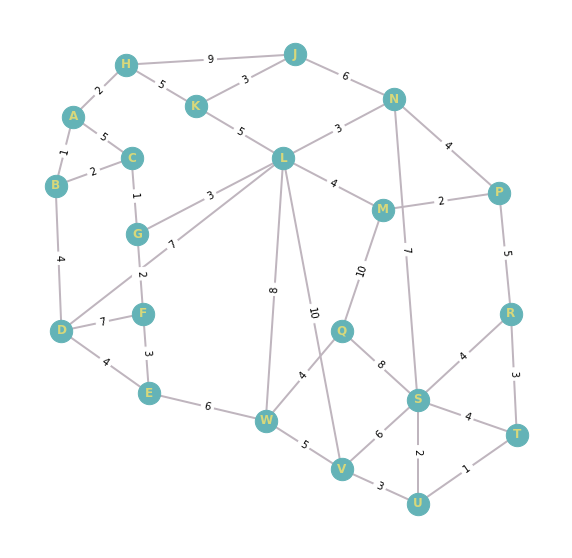

In [44]:
import networkx as nx
import matplotlib.pyplot as plt

graph = nx.Graph()

#loop to create nodes and edges
for node, neighbors in fig1_graph.items():
    graph.add_node(node)
    for neighbor, weight in neighbors.items():
        graph.add_edge(node, neighbor, weight=weight)

#Setting fixed position for the nodes to create a replica of figure given

fix_node_position = {
    'A': (-0.6,1.2),
    'B':(-0.9,-0.8),
    'C':(0.4,0),
    'D':(-0.8,-5),
    'E':(0.7,-6.8),
    'F':(0.6, -4.5),
    'G':(0.5,-2.2),
    'H':(0.3,2.7),
    'J':(3.2,3),
    'K':(1.5,1.5),
    'L':(3,0),
    'N':(4.9,1.7),
    'M':(4.7,-1.5),
    'P':(6.7,-1),
    'Q':(4,-5),
    'R':(6.9,-4.5),
    'S':(5.3,-7),
    'T':(7,-8),
    'U':(5.3,-10),
    'V':(4,-9),
    'W':(2.7,-7.6)
}

pos = fix_node_position

node_label = {node: node for node in graph.nodes()}

edge_label = {(u,v): d['weight'] for u,v,d in graph.edges(data=True)}

edge_colors= "#bfb5be"

def draw_graph(graph, pos, node_label, edge_label, edge_colors):
    
    plt.figure(figsize=(10,10))
    
    #Drawing nodes and edges with letters and weight using networkx library
    nx.draw_networkx_nodes(graph, pos, node_size=500, node_color = "#64b3b7")
    nx.draw_networkx_edges(graph,pos, edge_color=edge_colors, width=2)
    nx.draw_networkx_labels(graph, pos, labels=node_label, font_color="#d7d87b", font_weight="bold")
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_label)

    plt.axis('off')
    plt.show()
    
draw_graph(graph, pos, node_label, edge_label, edge_colors)

After graph is constructed the Dijkstra's algorithm is used to calculate shortest path

In [45]:
import heapq


def calculate_distances(graph, starting_vertex):
    distances = {vertex: float('infinity') for vertex in graph}
    distances[starting_vertex] = 0

    pq = [(0, starting_vertex)]
    while len(pq) > 0:
        current_distance, current_vertex = heapq.heappop(pq)

        # Nodes can get added to the priority queue multiple times. We only
        # process a vertex the first time we remove it from the priority queue.
        if current_distance > distances[current_vertex]:
            continue

        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight

            # Only consider this new path if it's better than any path we've
            # already found.
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor))

    return distances

#Line of code provided in-class called Dijkstra's Algorithm used to determine the shortest path

In [47]:
print(calculate_distances(fig1_graph,'A'))

{'A': 0, 'B': 1, 'C': 3, 'D': 5, 'E': 9, 'F': 6, 'G': 4, 'H': 2, 'J': 10, 'K': 7, 'L': 7, 'M': 16, 'N': 10, 'P': 14, 'Q': 19, 'R': 19, 'S': 17, 'T': 20, 'U': 19, 'V': 17, 'W': 15}


From the output, using Dijkstra's algorithm it displays the shortest distance to every node in the graph, but in the scenario given the goal is to reach to the solution (Node S) which is 17.

To display how Dijkstra's algorithm finds the shortest path, a table is created for the visited nodes to check distance by visiting each node, after shortest distance is set the previous node records the node which was used for the smallest value.

The following code creates a table with empty values for each node to record shortest path as nodes are visited

In [42]:
import pandas as pd
import numpy as np

nodes_table = {
    "Node": ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W'],
    "Short path": ['∞', '∞', '∞', '∞', '∞', '∞', '∞', '∞', '∞', '∞', '∞', '∞', '∞', '∞', '∞', '∞', '∞', '∞', '∞', '∞', '∞'],
    "Previous path": ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
}

nodes_df = pd.DataFrame(nodes_table)

#Setting nodes as index in order to update table values efficiently
nodes_df.set_index("Node", inplace=True)

#Functions to update the values of the table
def change_short(node, value):
    nodes_df.at[node, 'Short path'] = value 
    
def change_prev(node, value):
    nodes_df.at[node, 'Previous path'] = value

Nodes visited [A]

A-B: 1

A-C: 5

A-H: 2

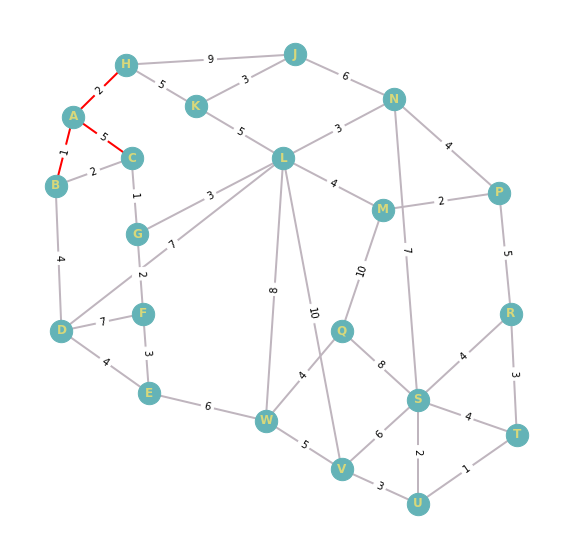

,Short path,Previous path
Node,,
A,0,
B,1,A
C,5,A
D,5,B
E,∞,
F,∞,
G,∞,
H,2,A
J,∞,


In [53]:
highlight_weights = {
    ('A','B'),
    ('A','C'),
    ('A','H')
}
edge_colors=["red" if (u,v) in highlight_weights else "#bfb5be" for u,v in graph.edges()]
draw_graph(graph, pos, node_label, edge_label, edge_colors)

change_short('A', 0)
change_prev('A','')
change_short('B', 1)
change_prev('B','A')
change_short('C', 5)
change_prev('C','A')
change_short('H', 2)
change_prev('H','A')

nodes_df

Nodes visited [A,B]

B-C: 1 + 2

B-D: 1 + 4

Distance from B to C is lower

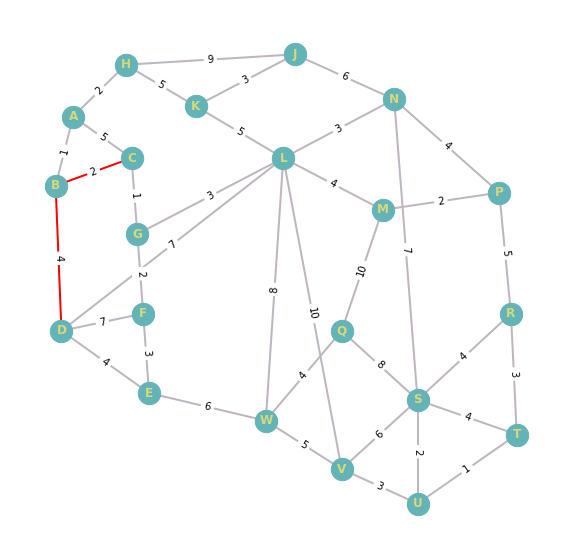

,Short path,Previous path
Node,,
A,0,
B,1,A
C,3,B
D,5,B
E,∞,
F,∞,
G,∞,
H,2,A
J,∞,


In [54]:
highlight_weights = {
    ('B','C'),
    ('B','D')
}
edge_colors=["red" if (u,v) in highlight_weights else "#bfb5be" for u,v in graph.edges()]
draw_graph(graph, pos, node_label, edge_label, edge_colors)

change_short('C', 3)
change_prev('C','B')
change_short('D', 5)
change_prev('D','B')

nodes_df

Node H has the smallest distance, it gets selected next

Nodes visited [A,B,H]

H-J: 2 + 9

H-K: 2 + 5

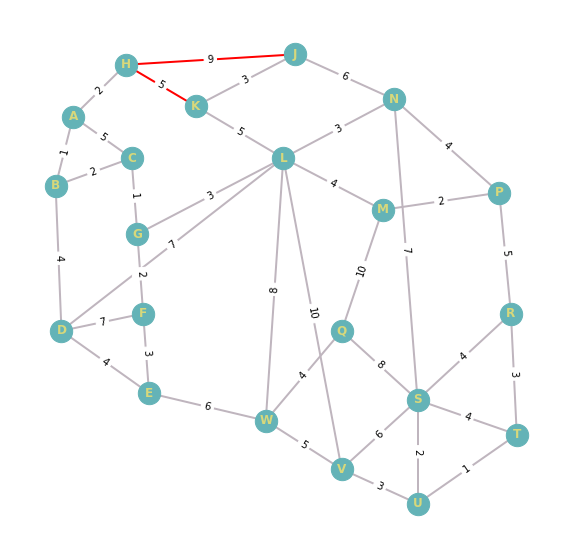

,Short path,Previous path
Node,,
A,0,
B,1,A
C,3,B
D,5,B
E,∞,
F,∞,
G,∞,
H,2,A
J,11,H


In [56]:
highlight_weights = {
    ('H','J'),
    ('H','K')
}
edge_colors=["red" if (u,v) in highlight_weights else "#bfb5be" for u,v in graph.edges()]
draw_graph(graph, pos, node_label, edge_label, edge_colors)

change_short('J', 11)
change_prev('J','H')
change_short('K', 7)
change_prev('K','H')

nodes_df

Node C has the smallest distance, it gets selected next

Nodes visited [A,B,H,C]

C-G: 3 + 1

In [ ]:
highlight_weights = {
    ('C','G')
}
edge_colors=["red" if (u,v) in highlight_weights else "#bfb5be" for u,v in graph.edges()]
draw_graph(graph, pos, node_label, edge_label, edge_colors)

change_short('J', 11)
change_prev('J','H')
change_short('K', 7)
change_prev('K','H')

nodes_df

## References

GeekforGeeks(2023)'Graph Data Structure And Algorithms' Available at: https://www.geeksforgeeks.org/graph-data-structure-and-algorithms/?ref=lbp (Accessed: 22 October 2023).

Tableau(2003-2023)'What Is Data Visualization? Definition, Examples, And Learning Resources' Available at: https://www.tableau.com/learn/articles/data-visualization (Accessed: 22 October 2023).

Cambridge Dictionaty(2023) Available at: https://dictionary.cambridge.org/ (Accessed: 22 October 2023).

Matplotlib(2012-2023)'Matplotlib 3.8.0 documentation' Available at: https://matplotlib.org/stable/ (Accessed: 22 October 2023).

Aric A. Hagberg, Daniel A. Schult and Pieter J. Swart, “Exploring network structure, dynamics, and function using NetworkX”, in Proceedings of the 7th Python in Science Conference (SciPy2008), Gäel Varoquaux, Travis Vaught, and Jarrod Millman (Eds), (Pasadena, CA USA), pp. 11–15, Aug 2008

TechTarget(1999-2023)'Data Visualization' Available at: https://www.techtarget.com/searchbusinessanalytics/resources/Data-visualization (Accessed: 25 October 2023).